In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo

pd.set_option('display.max_columns', None)

In [115]:
mortalidade_infatil= pd.read_excel('dataint.xlsx', header=0)

mortalidade_infatil.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,Spatial Dim Value Code,Location,Period type,Period,Is Latest Year,Dim1 type,Dim1,Dim1ValueCode,ValueFloat,Fact Value Numeric Low,Fact Value Numeric High,Value,ValueInt,FactComments,Language,DateModified
0,CHILDMORT5TO14,Mortality rate for 5-14 year-olds (probability...,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,True,Sex,Both sexes,SEX_BTSX,15.69,12.24,19.99,15.69 [12.24-19.99],157,NaN,EN,2023-02-16
1,CHILDMORT5TO14,Mortality rate for 5-14 year-olds (probability...,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,True,Sex,Male,SEX_MLE,16.16,12.33,20.84,16.16 [12.33-20.84],162,NaN,EN,2023-02-16
2,CHILDMORT5TO14,Mortality rate for 5-14 year-olds (probability...,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,True,Sex,Female,SEX_FMLE,15.23,11.62,19.74,15.23 [11.62-19.74],152,NaN,EN,2023-02-16
3,CHILDMORT5TO14,Mortality rate for 5-14 year-olds (probability...,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,False,Sex,Both sexes,SEX_BTSX,16.26,12.68,20.72,16.26 [12.68-20.72],163,NaN,EN,2023-02-16
4,CHILDMORT5TO14,Mortality rate for 5-14 year-olds (probability...,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,False,Sex,Male,SEX_MLE,16.69,12.76,21.56,16.69 [12.76-21.56],167,NaN,EN,2023-02-16


In [77]:
mortalidade_infatil.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'Spatial Dim Value Code', 'Location',
       'Period type', 'Period', 'Is Latest Year', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'ValueFloat', 'Fact Value Numeric Low',
       'Fact Value Numeric High', 'Value', 'ValueInt', 'FactComments',
       'Language', 'DateModified'],
      dtype='object')

In [116]:
mortalidade_infatil.drop(['Dim1 type', 'FactComments', 'DateModified', 'Is Latest Year', 'Indicator'],axis= 1, inplace = True)

mortalidade_infatil.head()


,IndicatorCode,ValueType,ParentLocationCode,ParentLocation,Location type,Spatial Dim Value Code,Location,Period type,Period,Dim1,Dim1ValueCode,ValueFloat,Fact Value Numeric Low,Fact Value Numeric High,Value,ValueInt,Language
0,CHILDMORT5TO14,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,Both sexes,SEX_BTSX,15.69,12.24,19.99,15.69 [12.24-19.99],157,EN
1,CHILDMORT5TO14,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,Male,SEX_MLE,16.16,12.33,20.84,16.16 [12.33-20.84],162,EN
2,CHILDMORT5TO14,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,Female,SEX_FMLE,15.23,11.62,19.74,15.23 [11.62-19.74],152,EN
3,CHILDMORT5TO14,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,Both sexes,SEX_BTSX,16.26,12.68,20.72,16.26 [12.68-20.72],163,EN
4,CHILDMORT5TO14,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,Male,SEX_MLE,16.69,12.76,21.56,16.69 [12.76-21.56],167,EN


In [79]:
mortalidade_infatil.columns

mortalidade_infatil.head()

,IndicatorCode,ValueType,ParentLocationCode,ParentLocation,Location type,Spatial Dim Value Code,Location,Period type,Period,Dim1,Dim1ValueCode,ValueFloat,Fact Value Numeric Low,Fact Value Numeric High,Value,ValueInt,Language
0,CHILDMORT5TO14,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,Both sexes,SEX_BTSX,15.69,12.24,19.99,15.69 [12.24-19.99],157,EN
1,CHILDMORT5TO14,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,Male,SEX_MLE,16.16,12.33,20.84,16.16 [12.33-20.84],162,EN
2,CHILDMORT5TO14,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,Female,SEX_FMLE,15.23,11.62,19.74,15.23 [11.62-19.74],152,EN
3,CHILDMORT5TO14,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,Both sexes,SEX_BTSX,16.26,12.68,20.72,16.26 [12.68-20.72],163,EN
4,CHILDMORT5TO14,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,Male,SEX_MLE,16.69,12.76,21.56,16.69 [12.76-21.56],167,EN


# **CONTINENTES COM A MAIOR TAXA DE MORTALIDADE**

Com base no nosso gráfico sobre (Continentes com maior taxa de mortalidade) e nossas pesquisas, a África tem a maior taxa percentual. É um indicador da qualidade dos serviços de saúde, saneamento básico e educação.Entre as principais causas da mortalidade infantil estão a falta de assistência e de instrução às gestantes, ausência de acompanhamento médico, deficiência na assistência hospitalar, desnutrição, déficit nos serviços de saneamento ambiental, entre outros. A ausência de saneamento provoca a contaminação da água e dos alimentos, podendo desencadear doenças como a hepatite A, malária, febre amarela, cólera, diarreia, etc.

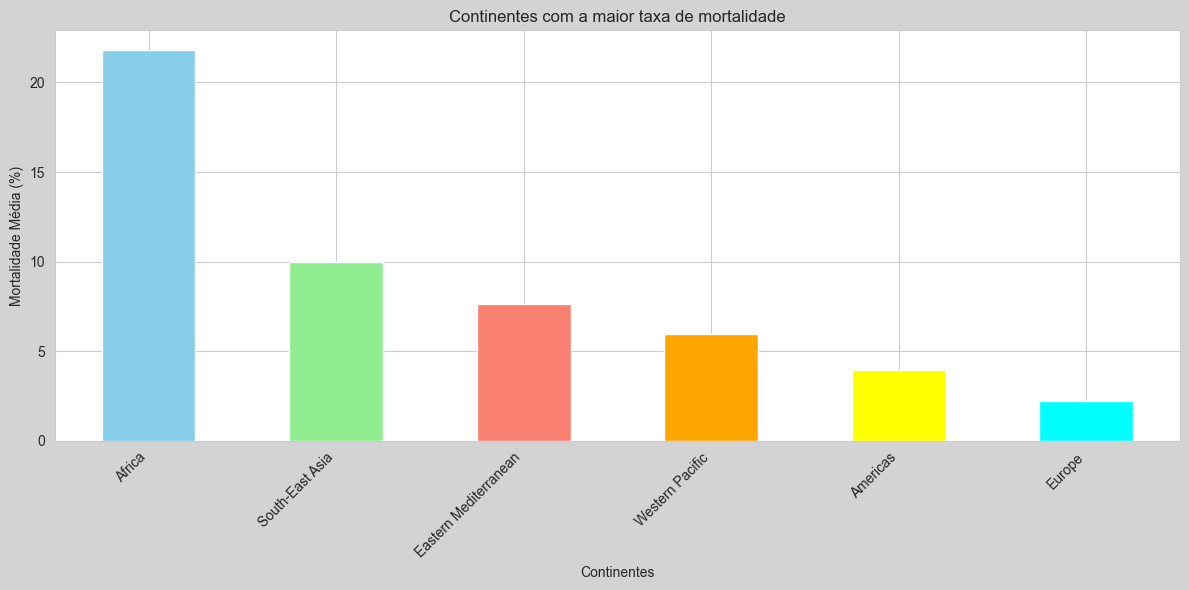

In [117]:
mortalidade_por_continente = mortalidade_infatil.groupby('ParentLocation')['ValueFloat'].mean()

Ranking = mortalidade_por_continente.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6), facecolor='lightgray')

Ranking.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'orange', 'yellow', 'cyan', 'magenta', 'lightblue', 'lightcoral', 'lightsalmon'])

plt.title('Continentes com a maior taxa de mortalidade')
plt.xlabel('Continentes')
plt.ylabel('Mortalidade Média (%)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


# **Evolução por Ano e por Continente**

Em relação ao gráfico e às pesquisas que fizemos podemos notar a queda da taxa de mortalidade em decorrência dos anos.A queda da mortalidade infantil nas sociedades mais desenvolvidas foi principalmente devido à redução das causas ligadas a fatores externos, como nutrição, saneamento e acesso aos cuidados de saúde. As doenças infecto-parasitárias foram controladas, mas as doenças respiratórias agudas ainda são um desafio parcial. No entanto, a mortalidade infantil relacionada a condições de saúde materna e complicações do parto diminuiu em menor escala.

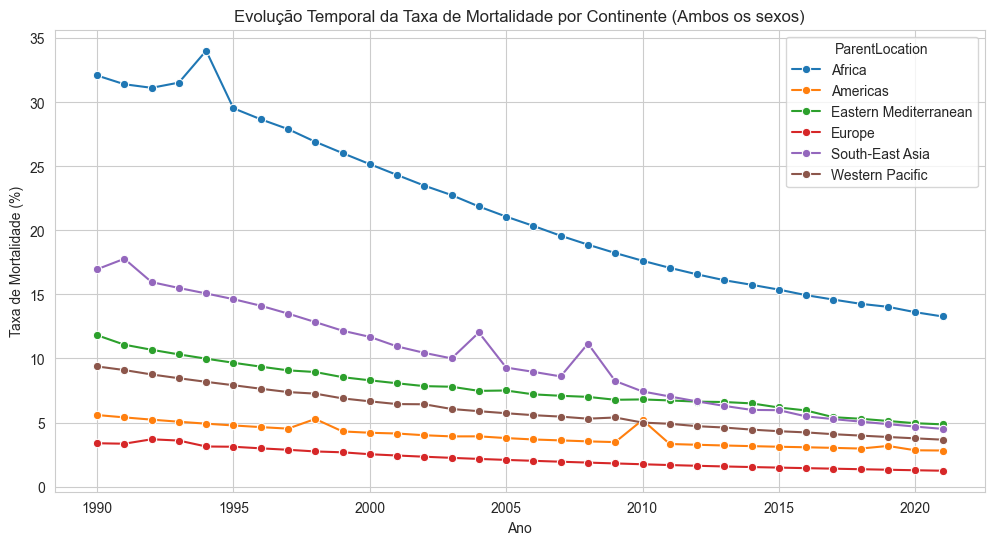

In [81]:
filtered_data = mortalidade_infatil[mortalidade_infatil['Dim1'] == 'Both sexes']
grouped_data = filtered_data.groupby(['ParentLocation', 'Period'])['ValueFloat'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Period', y='ValueFloat', hue='ParentLocation', marker='o')
plt.title('Evolução Temporal da Taxa de Mortalidade por Continente (Ambos os sexos)')
plt.xlabel('Ano')
plt.ylabel('Taxa de Mortalidade (%)')

plt.show()

# **Analisando Continente Africano**

Em relação ao continente Africano pode-se notar que Rwanda tem o maior indice de mortalidade entre os anos de 1990 a 2021 isso se dar além dos constantes conflitos étnicos, os habitantes sofrem com vários problemas socioeconômicos. Mais de 57% dos ruandeses vivem abaixo da linha de pobreza, ou seja, com menos de 1,25 dólar por dia; a subnutrição atinge 40% da população; a taxa de mortalidade infantil é de 97 óbitos a cada mil nascidos vivos; o índice de analfabetismo é de 35% e os serviços de saneamento ambiental são proporcionados para apenas 22% das residências. Enquando Niger lidera a segunda posição porque o país sofre os efeitos econômicos e industriais provenientes do período de colonização inglesa, que perdurou por cerca de 100 anos. Somam-se a esse fator os elevados índices de corrupção e os elevados níveis de endividamento do país, um dos maiores em toda a África.

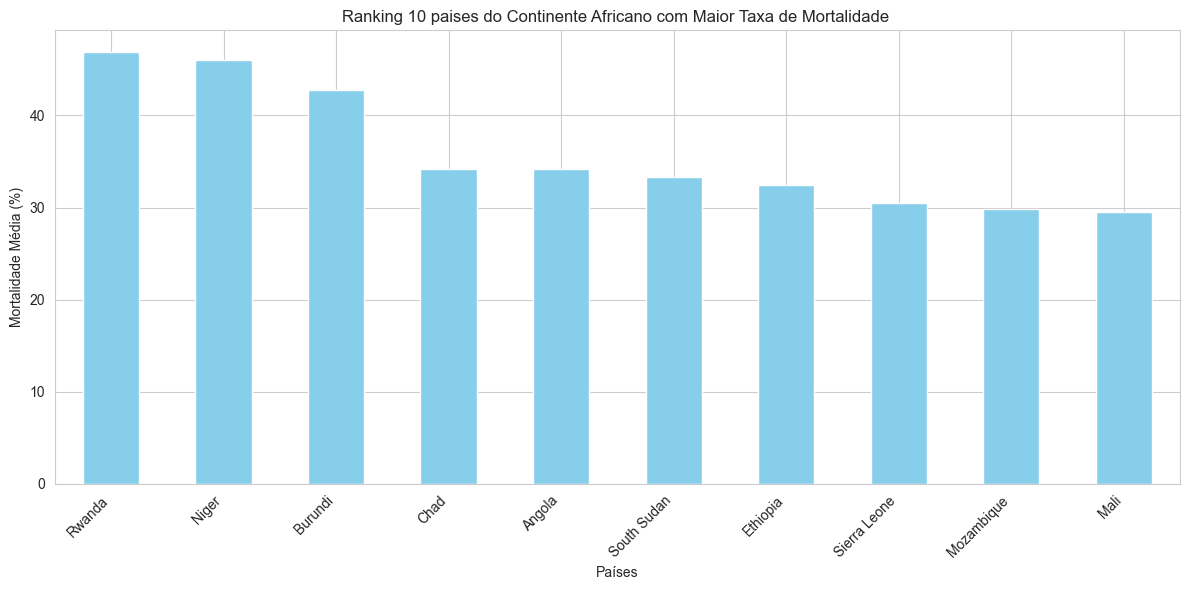

In [82]:
paises_africa = mortalidade_infatil[mortalidade_infatil['ParentLocation'] == 'Africa']

mortalidade_por_pais_africa = paises_africa.groupby('Location')['ValueFloat'].mean()

Ranking_10_paises_africa = mortalidade_por_pais_africa.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
Ranking_10_paises_africa.plot(kind='bar', color='skyblue')
plt.title('Ranking 10 paises do Continente Africano com Maior Taxa de Mortalidade ')
plt.xlabel('Países')
plt.ylabel('Mortalidade Média (%)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# **Países com maior taxa de mortalidade - Mundial**

Novamente temos aqui liderando a primeira posição a Rwanda além dos conflitos étinicos mencianados anteriormente a economia nacional é pouco desenvolvida, sendo a agricultura responsável por empregar a maioria dos habitantes. 
Em seguida temos o Haiti que detém o pior Índice de Desenvolvimento Humano (IDH) do continente americano. Entre os vários fatores que contribuem para essa situação estão: a expectativa de vida é de apenas 60 anos; os serviços de saneamento ambiental são destinados a menos da metade das residências; a maioria dos haitianos vive abaixo da linha de pobreza; cerca de 60% dos habitantes são subnutridos; o índice de analfabetismo é de 38%; a taxa de mortalidade infantil é de 62 para cada mil nascidos vivos. Além de todos esses problemas socioeconômicos, o Haiti, em janeiro de 2010, foi atingido por um terremoto que provocou a morte de mais de 120 mil pessoas.

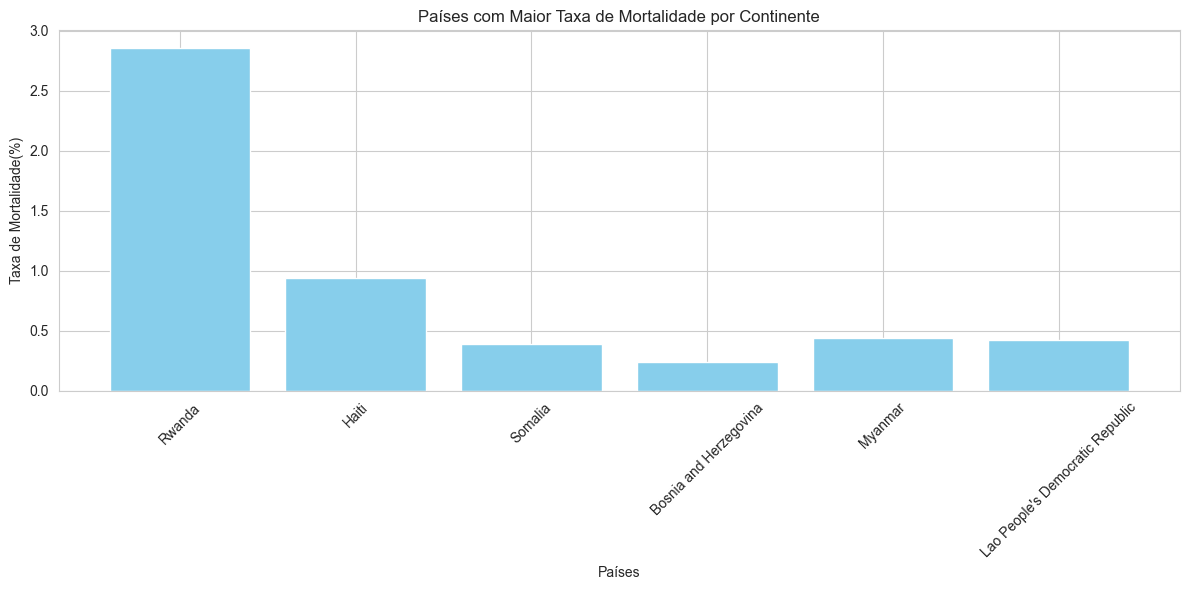

In [83]:
indice_max = mortalidade_infatil.groupby('ParentLocation')[['Location', 'ValueFloat']].agg({'ValueFloat': 'idxmax'})
mortalidade_infatil.loc[indice_max['ValueFloat']]
paises_max_mortalidade = mortalidade_infatil.loc[indice_max['ValueFloat']]

plt.figure(figsize=(12, 6))
plt.bar(paises_max_mortalidade['Location'], paises_max_mortalidade['ValueFloat'] /100, color='skyblue')
plt.title('Países com Maior Taxa de Mortalidade por Continente')
plt.xlabel('Países')
plt.ylabel('Taxa de Mortalidade(%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


https://www.emro.who.int/media/news/who-regional-director-for-the-eastern-mediterranean-concludes-visit-to-somalia.html

# *Comparativo 4 Países das Américas com médias de mortalidade ao longo dos anos*

Com base no gráfico, podemos notar que os anos 2004 e 2010 tiveram um pico de crescimento causado pelo Golpe de Estado no Haiti de 2004 (Violenta revolta popular e pressão internacional forçaram a renúncia do presidente Aristide, resultando em um número significativo de mortes e caos generalizado) e pelo terremoto de 2010 que atingiu o Haiti matando mais de 200 mil pessoas. Já nos outros países podemos notar uma estabilidade contínua dos anos de 1990 a 2020.
Ambos os sexos mantiveram índices próximos de acordo com a sua evolução farmacêutica,
estacionando no índice com números tendenciando a caírem.

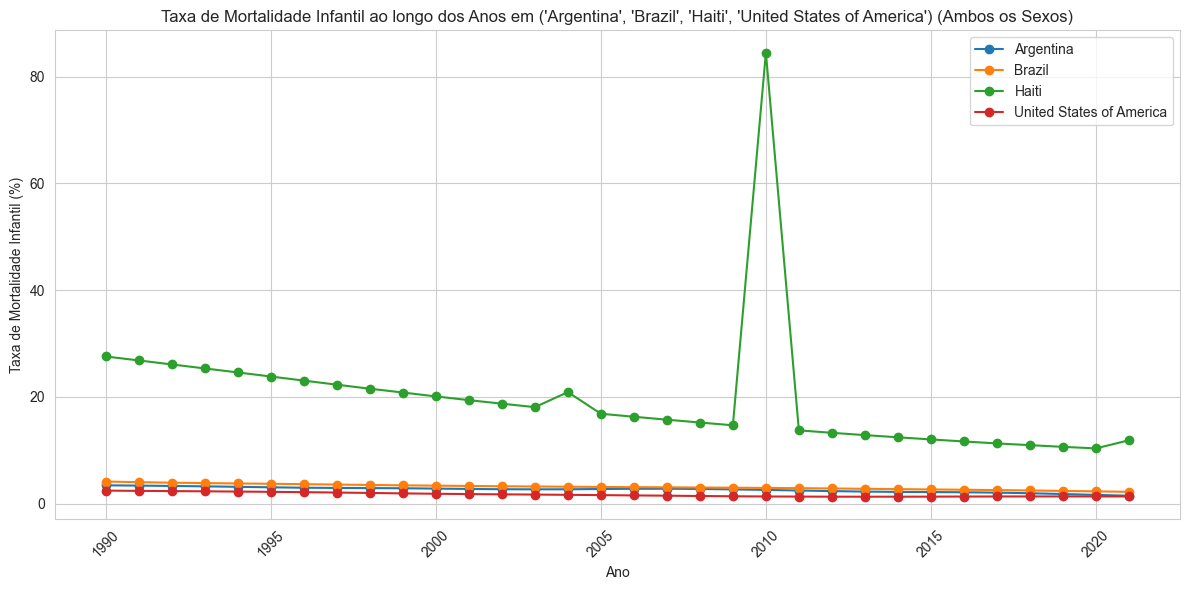

In [113]:
pais_selecionado = ('Argentina', 'Brazil', 'Haiti', 'United States of America')
dados_both_sexes = mortalidade_infatil[mortalidade_infatil['Dim1'] == 'Both sexes']
dados_pais = dados_both_sexes[dados_both_sexes['Location'].isin(pais_selecionado)].copy()

plt.figure(figsize=(12, 6))
for pais in pais_selecionado:
    dados_pais_pais = dados_pais[dados_pais['Location'] == pais]
    plt.plot(dados_pais_pais['Period'], dados_pais_pais['ValueFloat'], marker='o', label=pais)

plt.title(f'Taxa de Mortalidade Infantil ao longo dos Anos em {pais_selecionado} (Ambos os Sexos)')
plt.xlabel('Ano')
plt.ylabel('Taxa de Mortalidade Infantil (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Analisando o Brasil**
## Progressão anual da taxa de mortalidade no Brasil

Durante as últimas décadas, o Brasil tem apresentado grande redução na taxa de natalidade e de mortalidade.
Isso indica que houve melhora nas condições de vida da população, desde melhoria na alimentação, avanço da medicina, acesso à educação e saúde, dentre outros fatores.A taxa de mortalidade para crianças de até 5 anos caiu de 212,1 por mil para 14 por mil nesse mesmo período, sendo que cerca de 85,6% das crianças que não chegam aos 5 anos morreram no primeiro ano de vida e 14,4% entre 1 e 4 anos de idade. Avaliação do Ministério da Saúde mostra que a taxa da mortalidade na infância, entre menores de cinco anos, caiu 58% entre 1990 e 2008.

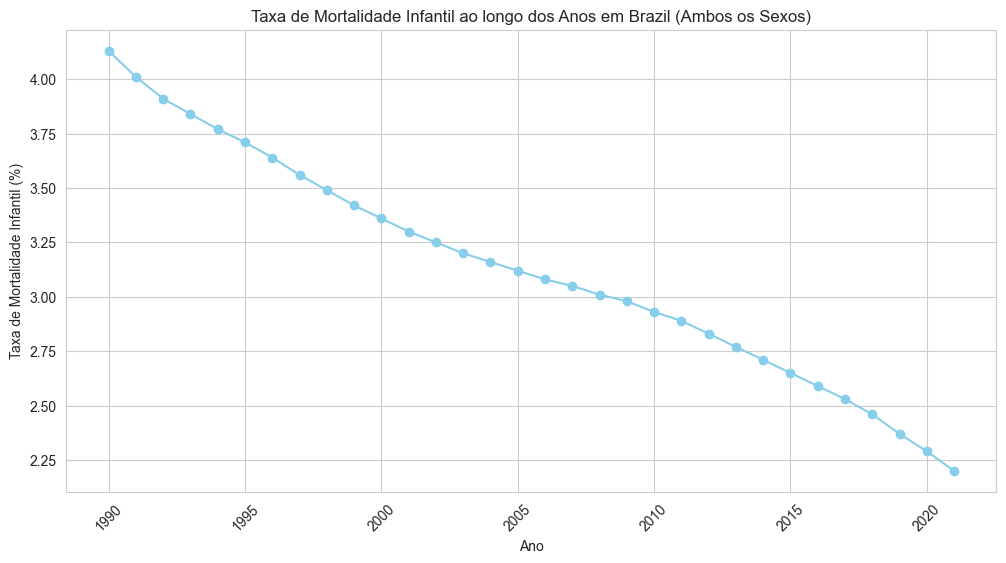

In [85]:
pais_selecionado = 'Brazil'

dados_both_sexes = mortalidade_infatil[mortalidade_infatil['Dim1'] == 'Both sexes']

dados_pais = dados_both_sexes[dados_both_sexes['Location'] == pais_selecionado].copy()

dados_pais = dados_pais.sort_values(by='Period')

plt.figure(figsize=(12, 6))
plt.plot(dados_pais['Period'], dados_pais['ValueFloat'], marker='o', color='skyblue')
plt.title(f'Taxa de Mortalidade Infantil ao longo dos Anos em {pais_selecionado} (Ambos os Sexos)')
plt.xlabel('Ano')
plt.ylabel('Taxa de Mortalidade Infantil (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# **Taxa de Mortalidade Infantil do Brasil ao longo dos Anos por Sexo**

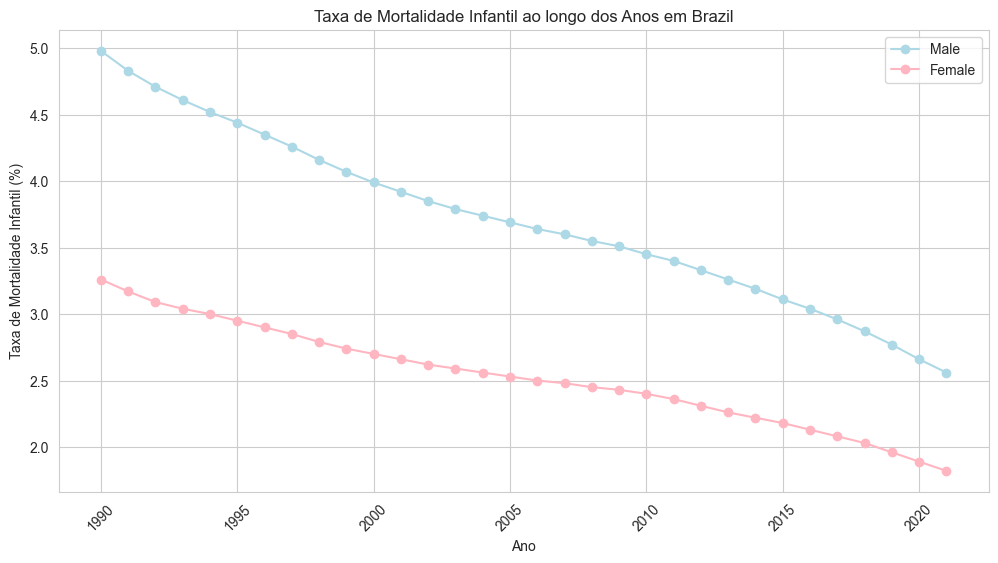

In [86]:
pais_selecionado = 'Brazil'

dados_male = mortalidade_infatil[(mortalidade_infatil['Dim1'] == 'Male') & (mortalidade_infatil['Location'] == pais_selecionado)].copy()

dados_male = dados_male.sort_values(by='Period')

dados_female = mortalidade_infatil[(mortalidade_infatil['Dim1'] == 'Female') & (mortalidade_infatil['Location'] == pais_selecionado)].copy()

dados_female = dados_female.sort_values(by='Period')

plt.figure(figsize=(12, 6))

plt.plot(dados_male['Period'], dados_male['ValueFloat'], marker='o', color='lightblue', label='Male')
plt.plot(dados_female['Period'], dados_female['ValueFloat'], marker='o', color='lightpink', label='Female')
plt.title(f'Taxa de Mortalidade Infantil ao longo dos Anos em {pais_selecionado}')
plt.xlabel('Ano')
plt.ylabel('Taxa de Mortalidade Infantil (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Mortalidade por sexo no Brasil

Diversos estudos indicam que a mortalidade para crianças do sexo masculino é maior
do que a do feminino no Brasil. Estudos recentes também têm mostrado uma redução na sobremortalidade infantil masculina nos últimos anos.Entretanto, pouco se sabe sobre quais fatores estão associados a esse fenômeno. As mortes associadas às causas externas ou não naturais, que incluem os homicídios, suicídios, acidentes de trânsito, afogamentos, quedas acidentais etc., passaram a
desempenhar um papel de destaque, de forma negativa, sobre a estrutura por idade das taxas de mortalidade,particularmente dos adultos jovens do sexo masculino. A expectativa de vida masculina no Brasil continuou elevando-se, mas poderia, na atualidade, ser superior à estimada, se não fosse o efeito das mortes prematuras de jovens por causas não naturais.

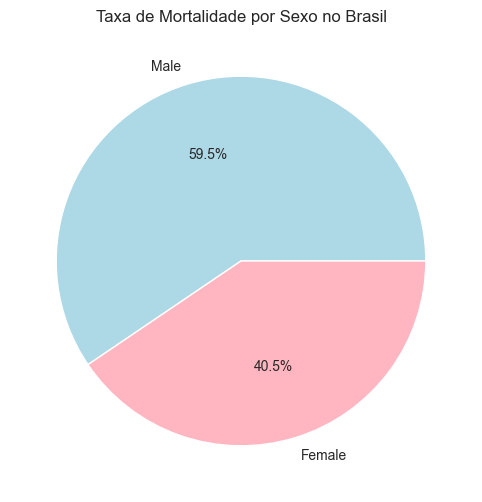

In [111]:
brasil_data = mortalidade_infatil[(mortalidade_infatil['Location'] == 'Brazil') & (mortalidade_infatil['Dim1'].isin(['Male', 'Female']))]
media_mortalidade_masculina = brasil_data[brasil_data['Dim1'] == 'Male']['ValueFloat'].mean()
media_mortalidade_feminina = brasil_data[brasil_data['Dim1'] == 'Female']['ValueFloat'].mean()


labels = ['Male', 'Female']
sizes = [media_mortalidade_masculina, media_mortalidade_feminina]
colors = ['lightblue', 'lightpink']
plt.figure(figsize=(12, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Taxa de Mortalidade por Sexo no Brasil')
plt.show()


In [63]:
Pobreza_brasil=pd.read_csv('pobrezabrasil.csv')

In [64]:
Pobreza_brasil.shape

(122, 21)

In [65]:
Pobreza_brasil['referencia'] = pd.to_datetime(Pobreza_brasil['referencia'], format='%m/%Y')
Pobreza_brasil['ano'] = Pobreza_brasil['referencia'].dt.year
Pobreza_brasil_anual = Pobreza_brasil.groupby('ano').mean()
print(Pobreza_brasil_anual)

              referencia   periodo       pobreza  extrema_pobreza  \
ano                                                                 
2012 2012-10-01 04:48:00  201210.0  1.937845e+07     4.459925e+07   
2013 2013-06-16 12:00:00  201306.5  1.932236e+07     4.437384e+07   
2014 2014-06-16 12:00:00  201406.5  1.874734e+07     4.492163e+07   
2015 2015-06-16 12:00:00  201506.5  1.500787e+07     4.062966e+07   
2016 2016-06-16 08:00:00  201606.5  1.387007e+07     3.856182e+07   
2017 2017-06-16 12:00:00  201706.5  1.258129e+07     3.880684e+07   
2018 2018-06-16 12:00:00  201806.5  1.062870e+07     3.848057e+07   
2019 2019-06-16 12:00:00  201906.5  9.378198e+06     3.869569e+07   
2020 2020-06-16 08:00:00  202006.5  8.712251e+06     3.948286e+07   
2021 2021-06-16 12:00:00  202106.5  8.589022e+06     4.120805e+07   
2022 2022-05-01 18:40:00  202205.0  8.968896e+06     4.725675e+07   

             total  populacao_estimada  porcentagem_pobreza  \
ano                                    

In [66]:
Pobreza_brasil


,referencia,periodo,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,familias_extrema_pobreza,familias_vulnerabilidade,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade,ano
0,2012-08-01,201208,19370363,44381455,63751818,193976530,0.10,0.23,0.33,5265743,12897221,18162964,14144,86593,100737,7927,57407,65334,119,757,876,2012
1,2012-09-01,201209,19371279,44554715,63925994,193976530,0.10,0.23,0.33,5278170,13006755,18284925,14157,87216,101373,8022,58018,66040,123,825,948,2012
2,2012-10-01,201210,19376665,44652093,64028758,193976530,0.10,0.23,0.33,5288902,13076366,18365268,14171,87397,101568,8081,58468,66549,131,888,1019,2012
3,2012-11-01,201211,19381040,44723215,64104255,193976530,0.10,0.23,0.33,5298295,13131359,18429654,14182,87697,101879,8198,59193,67391,142,925,1067,2012
4,2012-12-01,201212,19392882,44684759,64077641,193976530,0.10,0.23,0.33,5311337,13161099,18472436,14209,87820,102029,8314,60250,68564,143,978,1121,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2022-05-01,202205,8979446,46998630,55978076,213317639,0.04,0.22,0.26,3200245,18444762,21645007,13479,153358,166837,11674,176426,188100,778,7495,8273,2022
118,2022-06-01,202206,9042994,47268983,56311977,213317639,0.04,0.22,0.26,3236172,18764335,22000507,13878,156599,170477,11720,179663,191383,767,7713,8480,2022
119,2022-07-01,202207,9173896,47695827,56869723,213317639,0.04,0.22,0.27,3306740,19197806,22504546,14463,161439,175902,11843,184928,196771,766,7914,8680,2022
120,2022-08-01,202208,9346851,48369266,57716117,213317639,0.04,0.23,0.27,3404214,19820117,23224331,15074,166023,181097,12148,190505,202653,798,8196,8994,2022


## Famílias em Situação de Famílias em situação de pobreza, extrema pobreza e vulnerabilidade

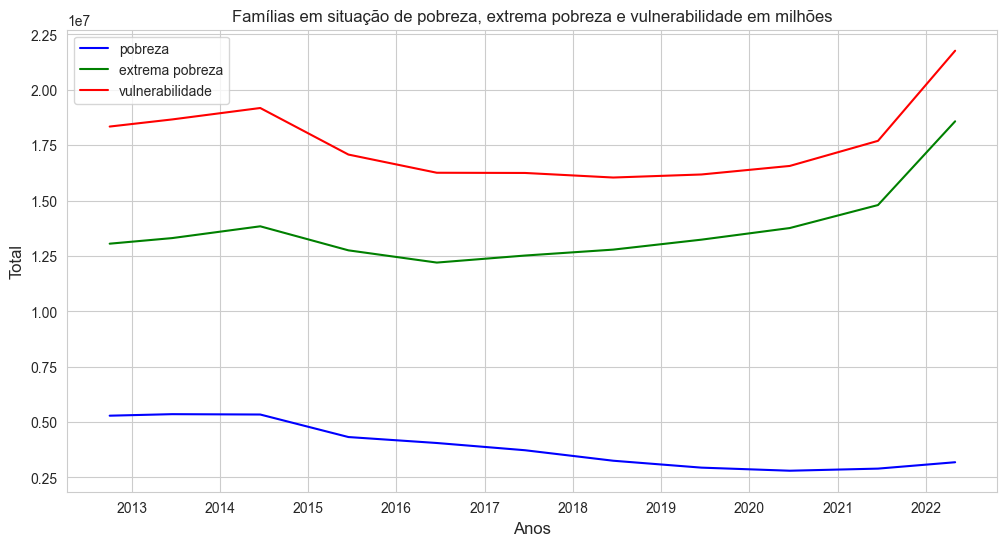

In [112]:
plt.figure(figsize=(12,6))
plt.plot(Pobreza_brasil_anual['referencia'], Pobreza_brasil_anual['familias_pobreza'], color = 'blue', label = 'pobreza')
plt.plot(Pobreza_brasil_anual['referencia'], Pobreza_brasil_anual['familias_extrema_pobreza'], color = 'green', ms = 5, label = 'extrema pobreza')
plt.plot(Pobreza_brasil_anual['referencia'], Pobreza_brasil_anual['familias_vulnerabilidade'], color = 'red', ms = 5, label = 'vulnerabilidade')
plt.xlabel('Anos', size = 12)
plt.ylabel('Total', size = 12)
plt.title('Famílias em situação de pobreza, extrema pobreza e vulnerabilidade em milhões', loc = 'center')
plt.legend()
plt.show()

## Gráfico comparativo taxa de mortalidade Brasil e Haiti

Haiti

Entorno de 80% dos haitianos vivem abaixo da linha da pobreza e 54% da pobreza total, o que torna o país mais pobre do continente americano. A taxa de desemprego é a cima da média de força de trabalho. Além disso, o Haiti sofre de inflação alta e falta de investimento devido à insegurança, infra-estrutura limitada e um grande déficit comercial. O governo depende da ajuda internacional para financiar parcialmente.  O século XX foi marcado pelos quase vinte anos de ocupação militar americana, por conflitos sangrentos, pela ditadura de Duvalier uma das mais ferozes do continente, por epidemias e doenças ligadas à pobreza, à fome e à má qualidade de vida. Diante disso o Haiti tem o pior indíce de desenvolvimento humano que acarreta a taxa de mortalidade muito de grande de crianças. 

Brasil

O país é a maior economia da America Latina, e décimo do mundo. O Brasil vem expandindo sua presença nos mercados financeiros internacionais e faz parte de um grupo de cinco economias emergentes formada por Brasil, Rússia, Índia, China, e África do Sul, conhecido com BRICS. No início do século XX o desenvolvimento de políticas sociais se constituiu em uma estratégia de incorporação de segmentos de classe média e dos trabalhadores urbanos ao projeto político de industrialização e modernização do país. 
Diante disso no Brasil, assim como na maioria dos outros países, essa taxa de mortalidade está reduzindo a cada ano. Conforme dados do Instituto Brasileiro de Geografia e Estatística (IBGE), a mortalidade infantil no Brasil segue em declínio. Em uma década (1998 – 2010) passou de 33,5 crianças mortas por mil nascidas vivas para 22

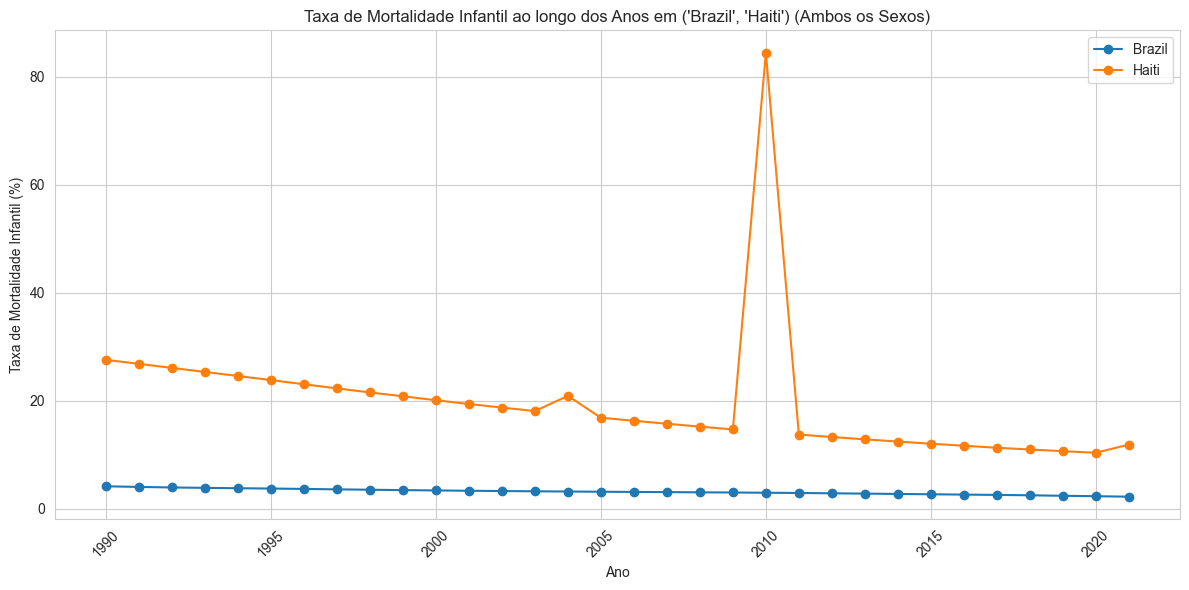

In [107]:
pais_selecionado = ('Brazil', 'Haiti')

# Filtrar os dados para incluir apenas 'Both sexes'
dados_both_sexes = mortalidade_infatil[mortalidade_infatil['Dim1'] == 'Both sexes']

dados_pais = dados_both_sexes[dados_both_sexes['Location'].isin(pais_selecionado)].copy()

plt.figure(figsize=(12, 6))
for pais in pais_selecionado:
    dados_pais_pais = dados_pais[dados_pais['Location'] == pais]
    plt.plot(dados_pais_pais['Period'], dados_pais_pais['ValueFloat'], marker='o', label=pais)

plt.title(f'Taxa de Mortalidade Infantil ao longo dos Anos em {pais_selecionado} (Ambos os Sexos)')
plt.xlabel('Ano')
plt.ylabel('Taxa de Mortalidade Infantil (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()